# Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing
### Jules EXBRAYAT & Abdenour MADANI

Quel est le client type de l'entreprise ?

Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnaliser la campagne marketing ?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t", index_col="ID")

In [4]:
df.head(50)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,...,9,0,0,0,0,0,0,3,11,1


In [5]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


## Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


In [6]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [7]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Dt_Customer",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

## Nettoyage des données

Données parasites : 2 colonnes non documentées, et qui contiennent des valeurs constantes => on les supprime.

In [9]:
print( np.sum(df['Z_CostContact'] == 3) ) # Z_CostContact constante égale à 3
print( np.sum(df['Z_Revenue'] == 11) ) # Z_Revenue constante égale à 11

2240
2240


In [10]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

### Données manquantes

In [11]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [24]:
df[df["Income"].isna()] # Il y a 24 données manquantes pour la variable Income
                        # On les remplace par la moyenne de Income

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,


In [22]:
income_mean = df["Income"].mean()

df_filtered = df[df["Income"].isna()]
df_filtered['Income'] = np.repeat(income_mean, 24)

df[df["Income"].isna()] = df_filtered

C:\Users\jules\AppData\Local\Temp\ipykernel_7584\1769407382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Income'] = np.repeat(income_mean, 24)


In [28]:
# Vérification du bon remplacement des valeurs manquantes
df[df["Income"].isna()].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,


In [14]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df[var_numeriques].plot(kind="box", subplots=True, sharey=False, figsize=(28, 4))

Year_Birth                AxesSubplot(0.125,0.11;0.0407895x0.77)
Income                 AxesSubplot(0.173947,0.11;0.0407895x0.77)
Kidhome                AxesSubplot(0.222895,0.11;0.0407895x0.77)
Teenhome               AxesSubplot(0.271842,0.11;0.0407895x0.77)
Recency                AxesSubplot(0.320789,0.11;0.0407895x0.77)
MntWines               AxesSubplot(0.369737,0.11;0.0407895x0.77)
MntFruits              AxesSubplot(0.418684,0.11;0.0407895x0.77)
MntMeatProducts        AxesSubplot(0.467632,0.11;0.0407895x0.77)
MntFishProducts        AxesSubplot(0.516579,0.11;0.0407895x0.77)
MntSweetProducts       AxesSubplot(0.565526,0.11;0.0407895x0.77)
MntGoldProds           AxesSubplot(0.614474,0.11;0.0407895x0.77)
NumDealsPurchases      AxesSubplot(0.663421,0.11;0.0407895x0.77)
NumWebPurchases        AxesSubplot(0.712368,0.11;0.0407895x0.77)
NumCatalogPurchases    AxesSubplot(0.761316,0.11;0.0407895x0.77)
NumStorePurchases      AxesSubplot(0.810263,0.11;0.0407895x0.77)
NumWebVisitsMonth      Ax

Error in callback <function flush_figures at 0x000001B4945F9B80> (for post_execute):


KeyboardInterrupt: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECEB7D75C8>,
      dtype=object)

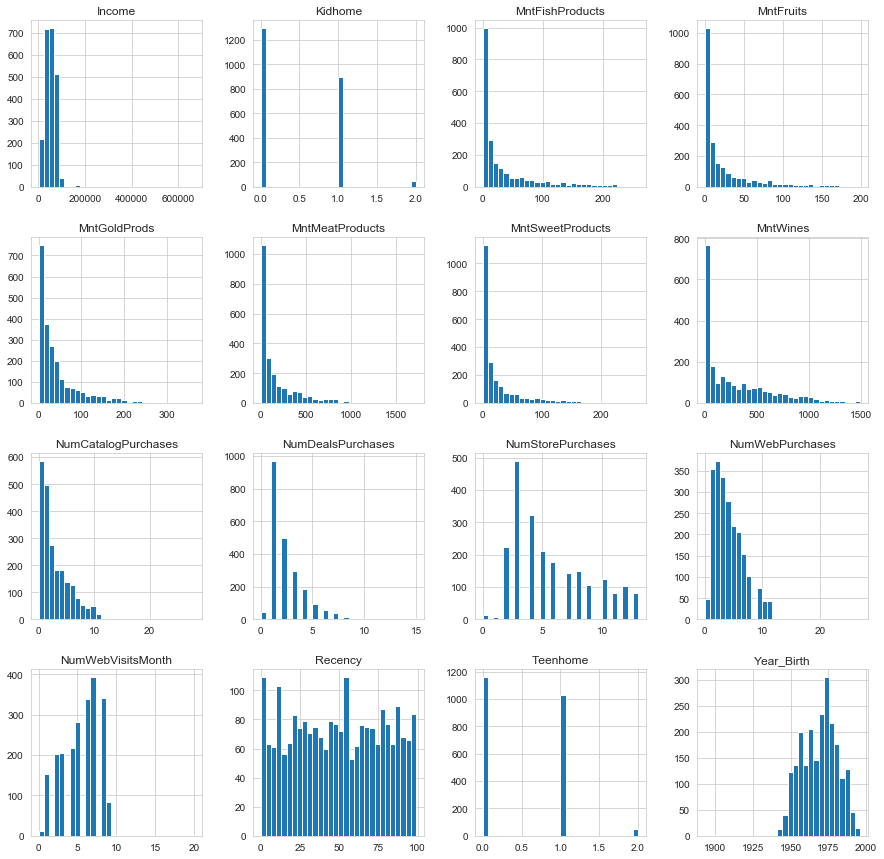

In [ ]:
df[var_numeriques].hist(figsize=(15, 15), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECEFE46248>,
      dtype=object)

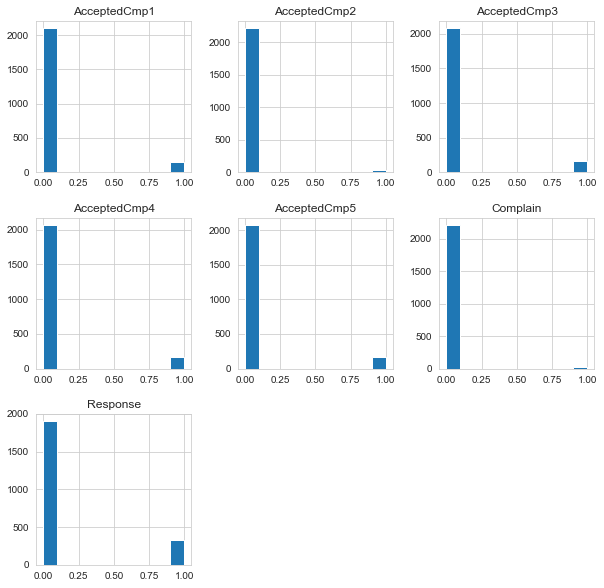

In [ ]:
df[var_categoriques].hist(figsize=(10, 10))

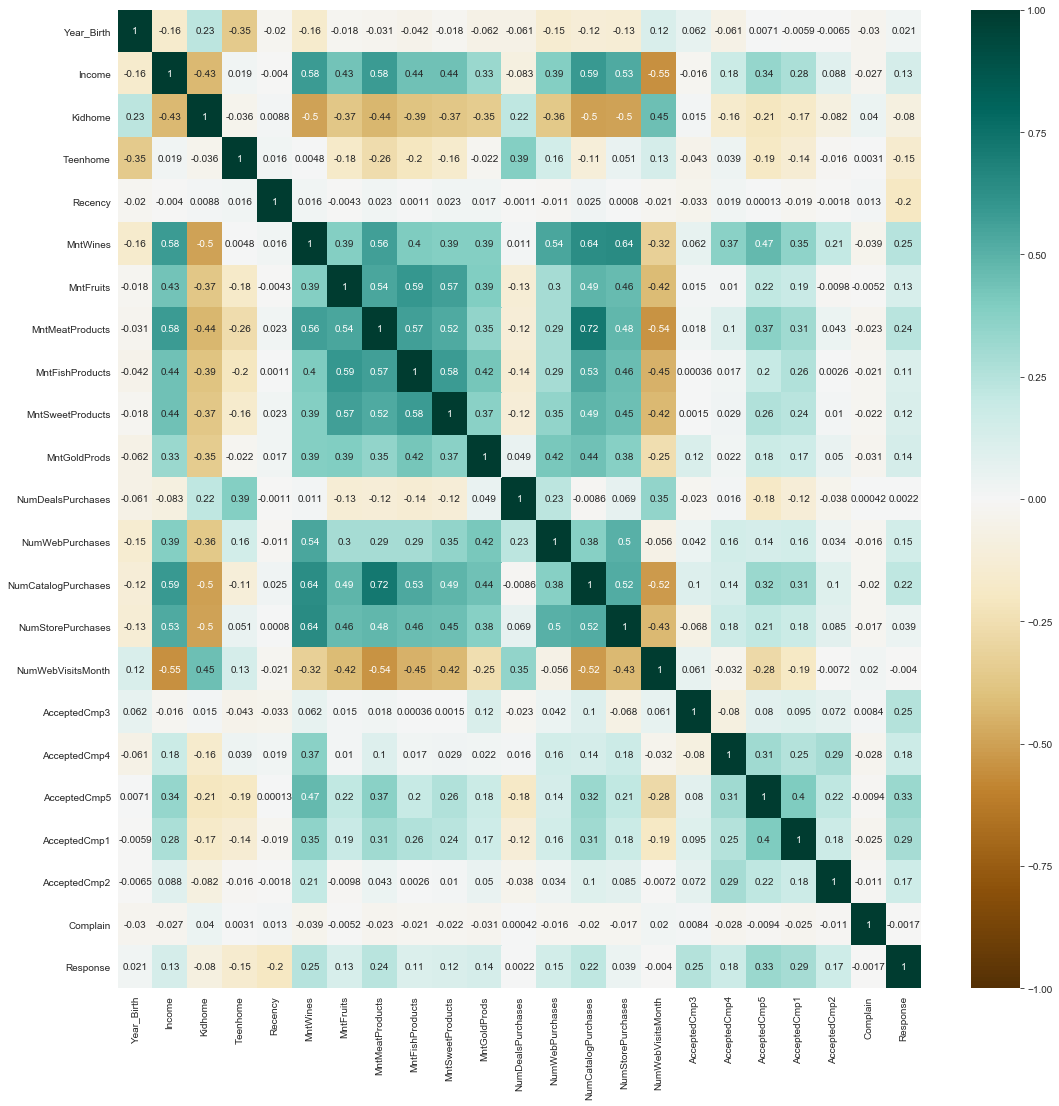

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, cmap="BrBG", vmax=1, vmin=-1)

In [ ]:
donnees_symetriques = df.copy()

In [ ]:
donnees_symetriques["Income"] = np.log(donnees_symetriques["Income"])

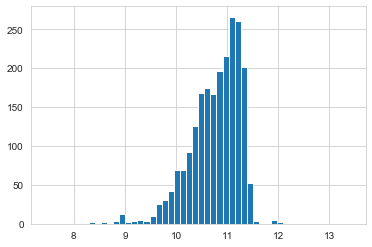

In [ ]:
donnees_symetriques["Income"].hist(bins=50)

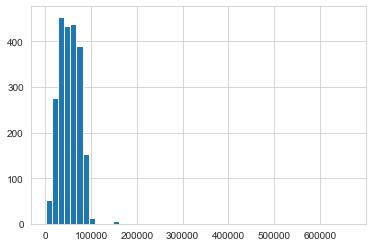

In [ ]:
df["Income"].hist(bins=50)

In [ ]:
# TODO: faire une fonction pour automatiser la transformation Box Cox sur chacune des données !

In [ ]:
donnees_symetriques["MntWines"] = np.log(donnees_symetriques["MntWines"] + 1)
donnees_symetriques["MntFruits"] = np.log(donnees_symetriques["MntFruits"] + 1)
donnees_symetriques["MntMeatProducts"] = np.log(
    donnees_symetriques["MntMeatProducts"] + 1
)
donnees_symetriques["MntFishProducts"] = np.log(
    donnees_symetriques["MntFishProducts"] + 1
)
donnees_symetriques["MntSweetProducts"] = np.log(
    donnees_symetriques["MntSweetProducts"] + 1
)
donnees_symetriques["MntGoldProds"] = np.log(donnees_symetriques["MntGoldProds"] + 1)

donnees_symetriques["NumDealsPurchases"] = np.log(
    donnees_symetriques["NumDealsPurchases"] + 1
)

donnees_symetriques["NumWebPurchases"] = np.log(
    donnees_symetriques["NumWebPurchases"] + 1
)
donnees_symetriques["NumCatalogPurchases"] = np.log(
    donnees_symetriques["NumCatalogPurchases"] + 1
)
donnees_symetriques["NumStorePurchases"] = np.log(
    donnees_symetriques["NumStorePurchases"] + 1
)
donnees_symetriques["NumWebVisitsMonth"] = np.log(
    donnees_symetriques["NumWebVisitsMonth"] + 1
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECF09D5E08>,
      dtype=object)

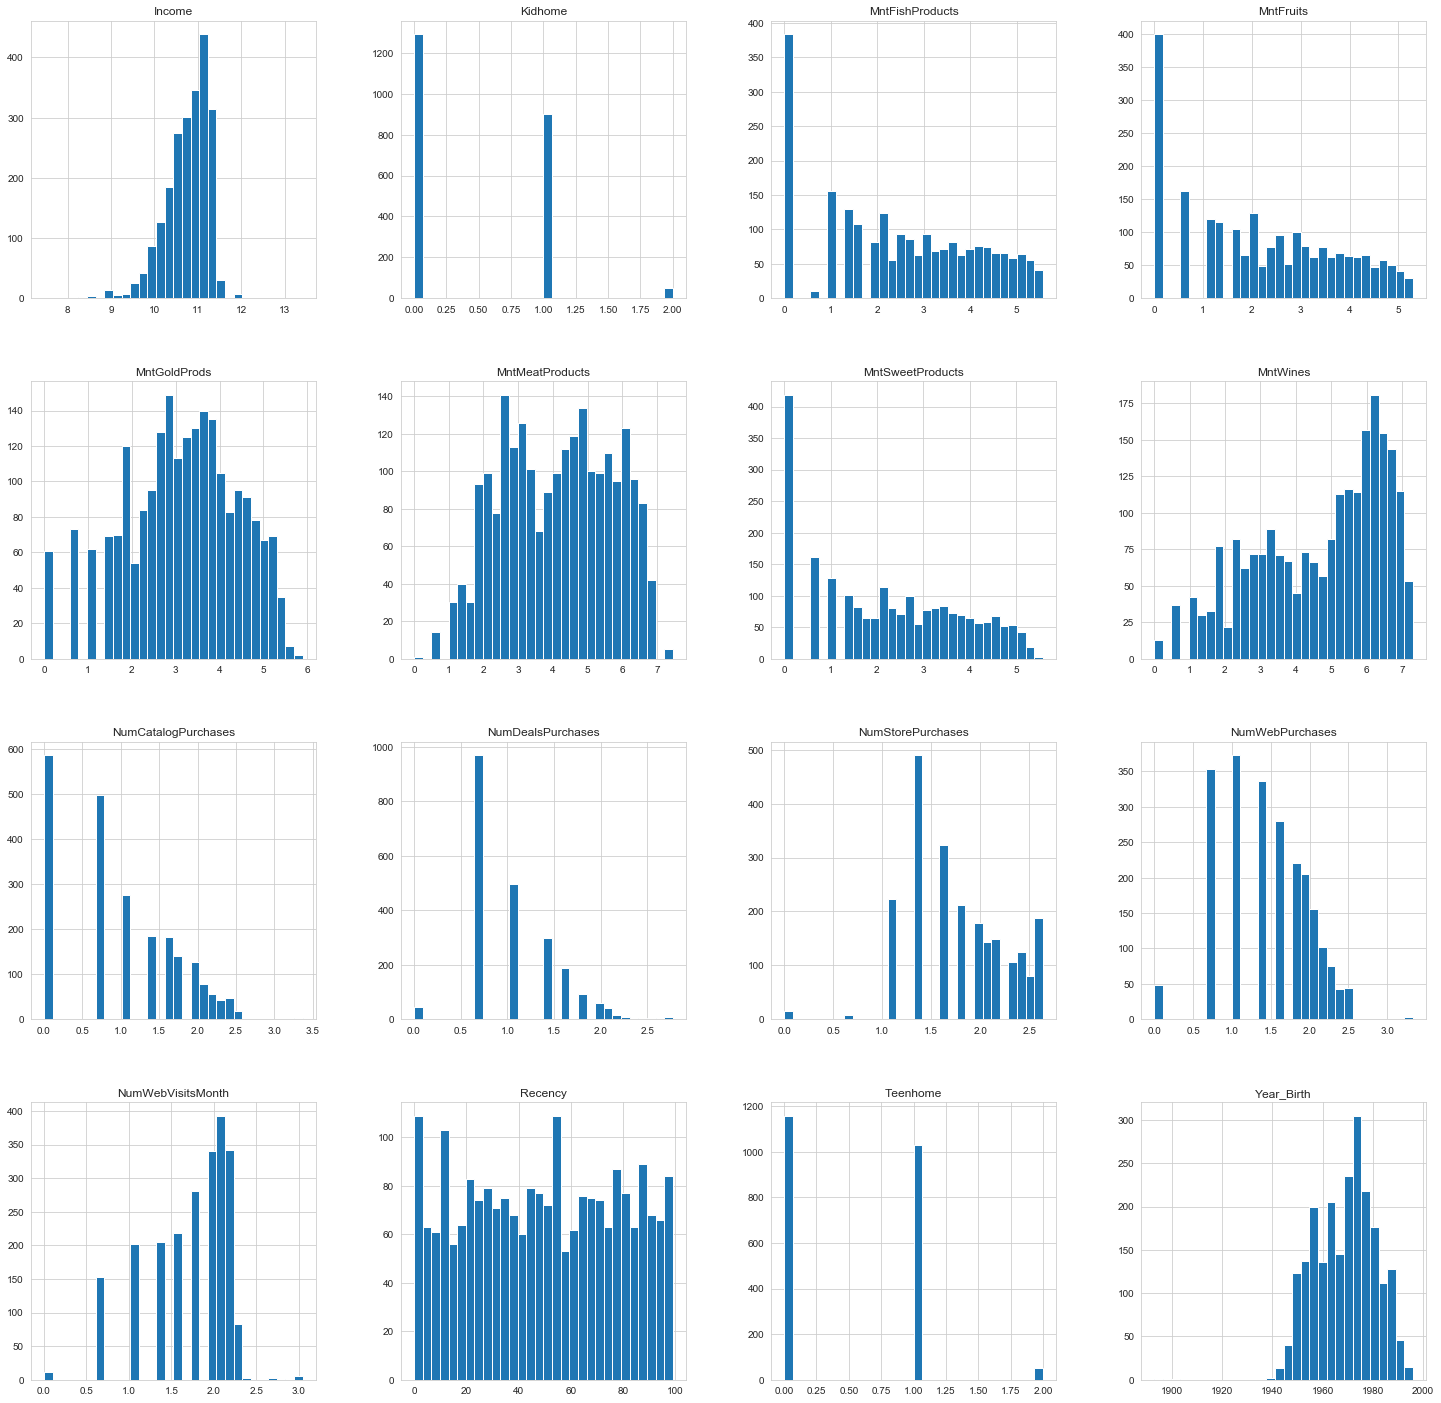

In [ ]:
donnees_symetriques[var_numeriques].hist(figsize=(25, 25), bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ecd61e3308>,
 'caps': [<matplotlib.lines.Line2D at 0x1ecd62cde08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ecd62b0908>],
 'medians': [<matplotlib.lines.Line2D at 0x1ecd62d0b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ecd62d22c8>],
 'means': []}

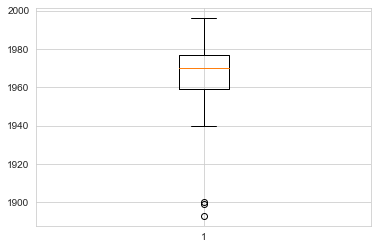

In [ ]:
plt.boxplot(donnees_symetriques["Year_Birth"])

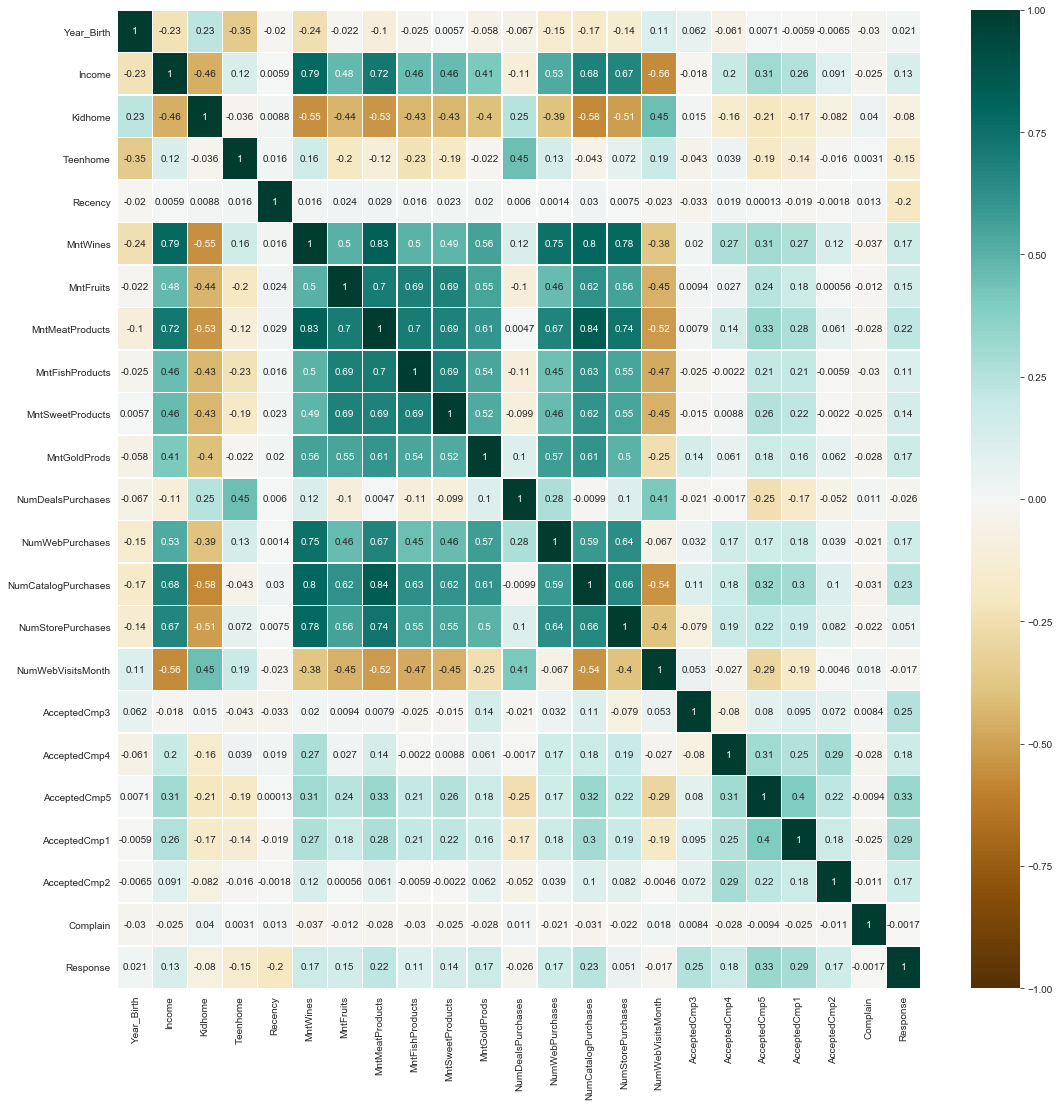

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    donnees_symetriques.corr(),
    annot=True,
    linewidths=0.5,
    cmap="BrBG",
    vmax=1,
    vmin=-1,
)

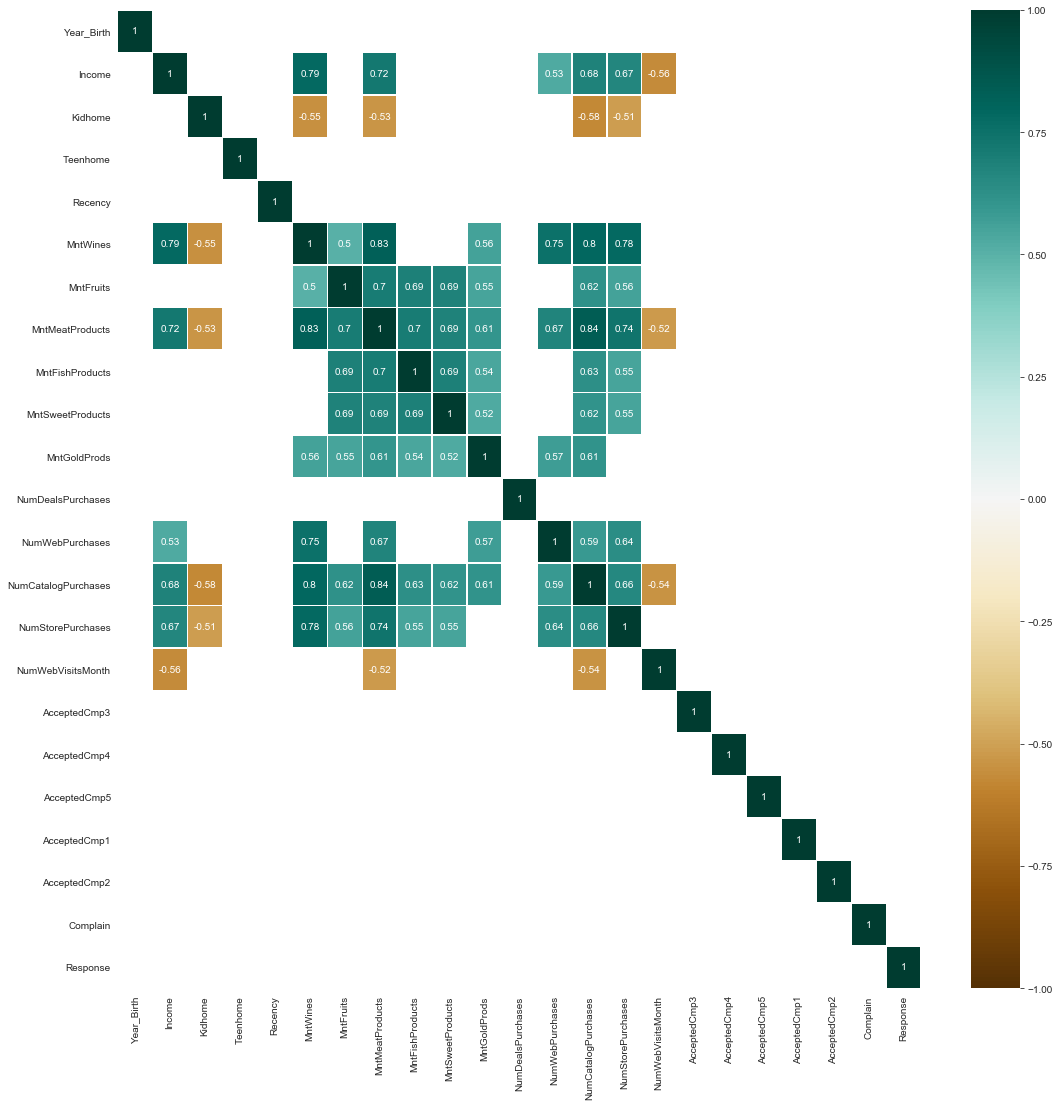

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    donnees_symetriques.corr()[donnees_symetriques.corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [ ]:
donnes_symetriques_nettoyees = donnees_symetriques.copy()

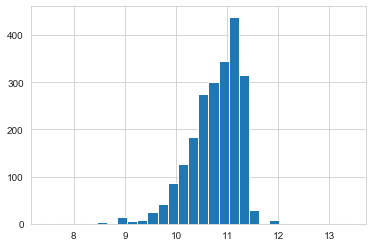

In [ ]:
donnes_symetriques_nettoyees["Income"].hist(bins=30)

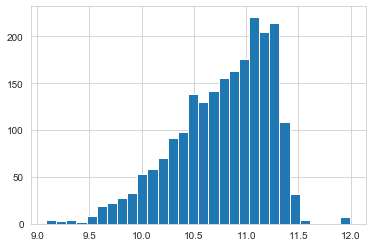

In [ ]:
donnes_symetriques_nettoyees["Income"][donnes_symetriques_nettoyees["Income"] < 13][
    donnes_symetriques_nettoyees["Income"] > 9
].hist(bins=30)

In [ ]:
donnes_symetriques_nettoyees["Income"] = donnes_symetriques_nettoyees["Income"][
    donnes_symetriques_nettoyees["Income"] < 13
][donnes_symetriques_nettoyees["Income"] > 9]

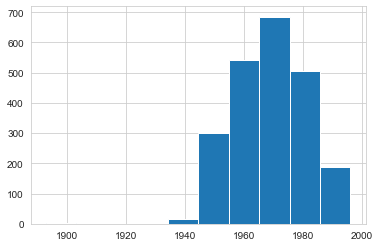

In [ ]:
donnes_symetriques_nettoyees["Year_Birth"].hist()

In [ ]:
donnes_symetriques_nettoyees["Year_Birth"].min()

1893

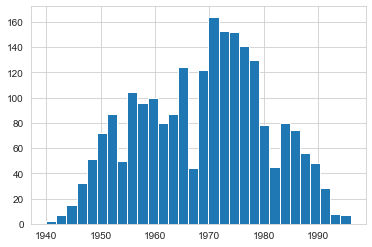

In [ ]:
donnes_symetriques_nettoyees["Year_Birth"][
    donnes_symetriques_nettoyees["Year_Birth"] > 1930
].hist(bins=30)

In [ ]:
donnes_symetriques_nettoyees["Year_Birth"] = donnes_symetriques_nettoyees["Year_Birth"][
    donnes_symetriques_nettoyees["Year_Birth"] > 1930
]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECF1D9EC88>,
      dtype=object)

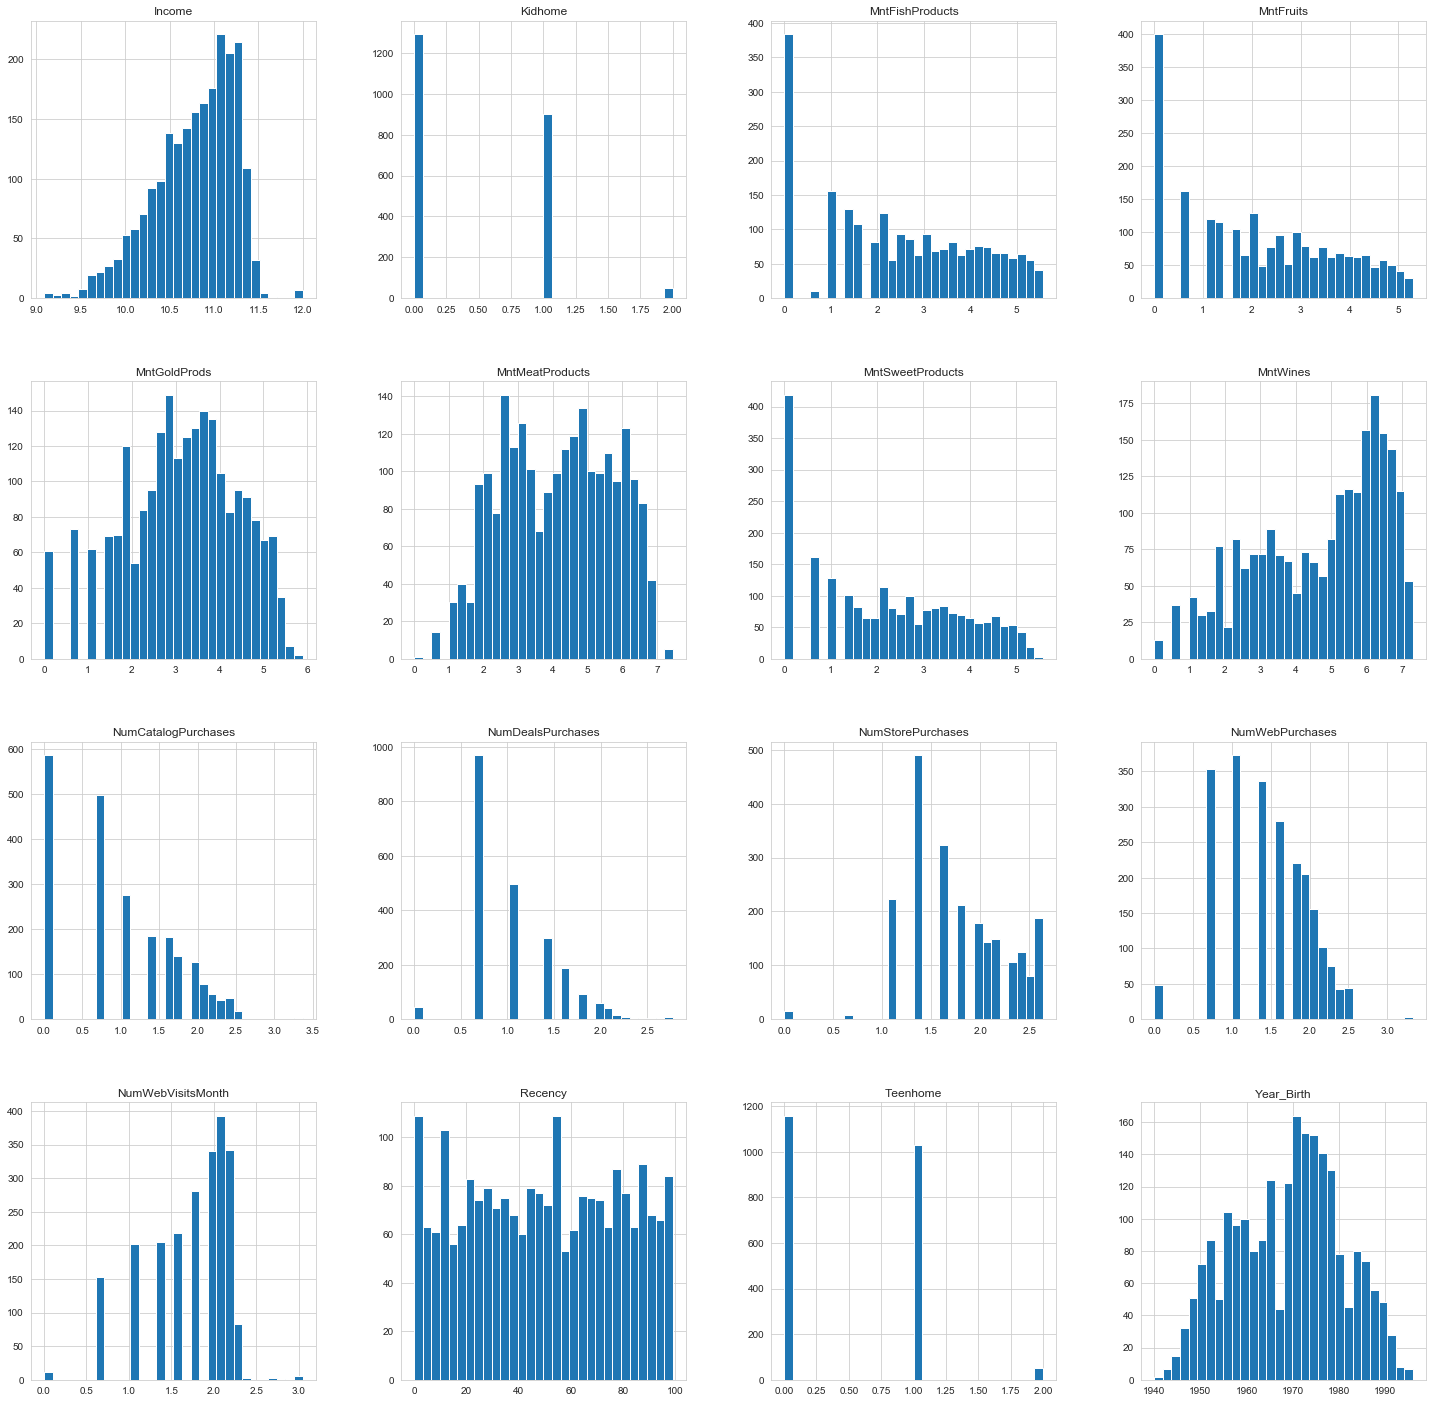

In [ ]:
donnes_symetriques_nettoyees[var_numeriques].hist(figsize=(25, 25), bins=30)

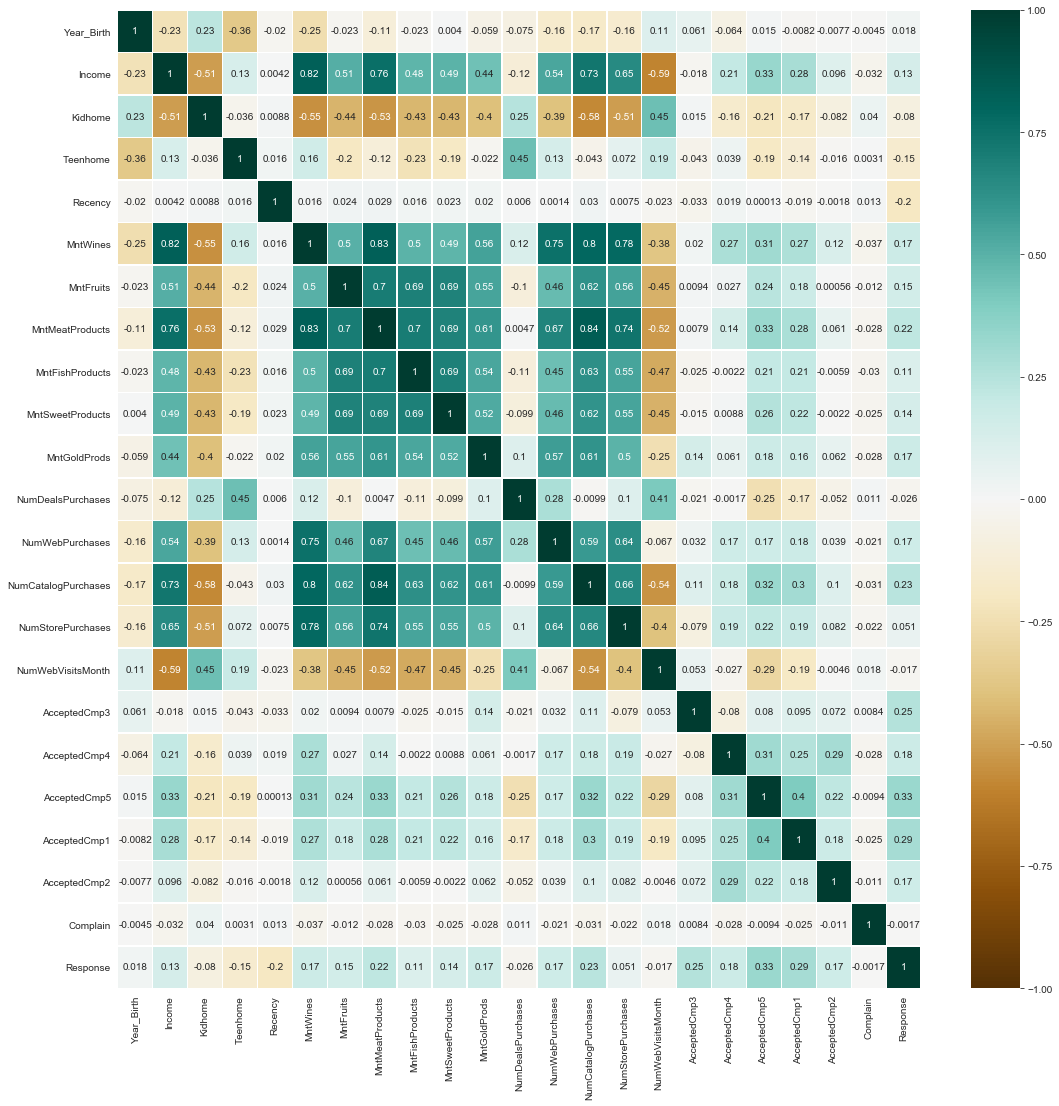

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(
    donnes_symetriques_nettoyees.corr(),
    annot=True,
    linewidths=0.5,
    cmap="BrBG",
    vmax=1,
    vmin=-1,
)